# Structure

Mail us the link to the google drive when you are done.

All artifacts have to be in this format in a folder in google drive

- absa/src - contains all the source needed for model inferencing
- absa/notebooks - experimental notebooks
- absa/models - contains all models
- absa/main.py - API code
- absa/src/evaluation.py - should load the model and test file, generate results and save the result to `absa/data/results/test.csv` with columns `text, aspect and label`
- training_methodology - doc about your training approach
- deployment_pipeline doc - doc about your deployment pipeline in AWS for live inferencing (not a batch process)
    - You can choose any approach to deploy
    - API should be able to scale as needed
    - Load profile in live inferencing is bursty in nature i.e can have spikes of load

# API

In [ ]:
!pip install flask gevent requests pillow

In [ ]:
!pip install flask-ngrok

# Testing API with ngrok tunnel

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.models import load_model
import tensorflow as tf
import warnings
import pandas as pd
import numpy as np
import json
import re
import pickle
import string
import sys
import getopt

"""# Process"""

# Spacy
nlp = spacy.load('en')

# Other

warnings.filterwarnings('ignore')

# Keras


def remove_punc(aspect):
    punc = string.punctuation
    temp = ""
    for i in aspect:
        if i not in punc:
            temp += i
    return temp

import io
import json

from flask import Flask, jsonify, request
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)



def get_prediction(model, text, aspect):
  df = pd.DataFrame({'text':[text], 'aspect':[aspect]})
  test_tokenized = pd.DataFrame(tokenizer.texts_to_matrix(df.text))
  test_tokenized2 = pd.DataFrame(tokenizer2.texts_to_matrix(df.aspect))
  test_tokenized3 = pd.concat([test_tokenized, test_tokenized2], axis=1)
  # print(test_tokenized3)
  if model == 'dl':
    return label_encoder.inverse_transform(np.argmax(absa_model.predict(test_tokenized3), axis=-1))
  elif model in ("lr", "knn", "dt", "svc"):
    return absa_model.predict(test_tokenized3)
  else:
    return 'Error'
def load_model_encoders(model, modelfile):
  global absa_model
  global tokenizer
  global tokenizer2
  global label_encoder
  model_loc = "./models/"
  text_tok = model_loc+modelfile+'text_tokenizer_'+model
  with open(text_tok, 'rb') as handle:
    tokenizer = pickle.load(handle)
  aspect_tok = model_loc+modelfile+'aspect_tokenizer_'+model
  with open(aspect_tok, 'rb') as handle:
    tokenizer2 = pickle.load(handle)
  label_en = model_loc+modelfile+'label_encoder_'+model
  with open(label_en, 'rb') as handle:
    label_encoder = pickle.load(handle)
  
  if model == "dl":
    model_name = model_loc+modelfile+'dl'
    absa_model = load_model(model_name)
    return
  if model == "lr":
    pkl_filename = model_loc+modelfile+'lr.pkl'
    with open(pkl_filename, 'rb') as file:
      absa_model = pickle.load(file)
    return
  if model == "knn":
    pkl_filename = model_loc+modelfile+'knn.pkl'
    with open(pkl_filename, 'rb') as file:
      absa_model = pickle.load(file)
    return
  if model == "dt":
    pkl_filename = model_loc+modelfile+'dt.pkl'
    with open(pkl_filename, 'rb') as file:
      absa_model = pickle.load(file)
    return
  if model == "svc":
    pkl_filename = model_loc+modelfile+'svc.pkl'
    with open(pkl_filename, 'rb') as file:
      absa_model = pickle.load(file)
    return

@app.route('/', methods=['GET'])
def home():
   return jsonify({'model': 'MODEL_TYPE', 'modelfile': 'MODEL_FILE_NAME', 'text': 'TEXT', 'aspect': 'ASPECT'})

@app.route('/predict', methods=['GET'])
def predict():
    if request.method == 'GET':
        # data = request.get_json()     # status code
        # return request.args
        # return jsonify({'data': data})
        if ['aspect', 'model', 'modelname', 'text'] != sorted(list(request.args.keys())):
          return jsonify({'model': 'MODEL_TYPE', 'modelfile': 'MODEL_FILE_NAME', 'text': 'TEXT', 'aspect': 'ASPECT'})
        model = str(request.args.get('model'))
        if request.args.get('modelfile') == None:
          modelfile = ""
        else:
          modelfile = str(request.args.get('modelfile'))
        text = str(request.args.get('text'))
        aspect = str(request.args.get('aspect'))
        print(text, aspect)
        # if model != cache_model and modelfile != cache_modelfile: 
        load_model_encoders(model, modelfile)
          # cache_model = model
          # cache_modelfile = modelfile
        
        sentiment = get_prediction(model, text, aspect).tolist()[0]
        return jsonify({'sentiment': sentiment})


if __name__ == '__main__':
    app.run()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://7853-35-185-69-18.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [27/Aug/2021 08:24:24] "GET /predict?model=lr&modelname=&text=customer%20is%20bad&aspect=customer HTTP/1.1" 200 -


customer is bad customer


# Code Files run

In [1]:
cd /content/drive/MyDrive/absa

/content/drive/MyDrive/absa


In [5]:
!python src/train.py -m all

Text tokenizer saved to  ./models/text_tokenizer_dl
Aspect tokenizer saved to  ./models/aspect_tokenizer_dl
Label Encoder saved to  ./models/label_encoder_dl
Text tokenizer saved to  ./models/text_tokenizer_lr
Aspect tokenizer saved to  ./models/aspect_tokenizer_lr
Label Encoder saved to  ./models/label_encoder_lr
Text tokenizer saved to  ./models/text_tokenizer_knn
Aspect tokenizer saved to  ./models/aspect_tokenizer_knn
Label Encoder saved to  ./models/label_encoder_knn
Text tokenizer saved to  ./models/text_tokenizer_dt
Aspect tokenizer saved to  ./models/aspect_tokenizer_dt
Label Encoder saved to  ./models/label_encoder_dt
Text tokenizer saved to  ./models/text_tokenizer_svc
Aspect tokenizer saved to  ./models/aspect_tokenizer_svc
Label Encoder saved to  ./models/label_encoder_svc
Text tokenizer saved to  ./models/text_tokenizer_all
Aspect tokenizer saved to  ./models/aspect_tokenizer_all
Label Encoder saved to  ./models/label_encoder_all
Deep Learning - all
2021-08-27 17:46:08.876

Filesystem      Size  Used Avail Use% Mounted on
drive           108G   41G   68G  38% /content/drive


In [ ]:
!python src/train.py -h

In [5]:
!python src/evaluation.py -m lr

Text tokenizer loaded from  ./models/text_tokenizer_lr
Aspect tokenizer loaded from  ./models/aspect_tokenizer_lr
Label Encoder loaded from  ./models/label_encoder_lr
Linear Regression - lr
Model loaded from  ./models/lr.pkl
Result saved to  ./data/results/test.csv


# Prerequisites

In [7]:
cd /content/drive/MyDrive/absa

/content/drive/MyDrive/absa


In [8]:
!apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (91.4 kB/s)
Selecting previously unselected package tree.
(Reading database ... 148489 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [9]:
!tree .

.
├── data
│   ├── results
│   │   └── test.csv
│   ├── test.csv
│   └── train.csv
├── main.py
├── models
│   ├── aspect_tokenizer_lr
│   ├── label_encoder_lr
│   ├── lr.pkl
│   └── text_tokenizer_lr
├── notebooks
│   └── enterpret.ipynb
├── src
│   ├── evaluation.py
│   └── train.py
├── training_methodology.txt
└── trash
    ├── assets
    ├── keras_metadata.pb
    ├── saved_model.pb
    └── variables
        ├── variables.data-00000-of-00001
        └── variables.index

8 directories, 16 files


In [10]:
!pip install stanza

     |████████████████████████████████| 342 kB 5.1 MB/s 


In [11]:
import nltk

In [12]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [13]:
# import stanza
# stanza.download('en') # download English model
# nlp = stanza.Pipeline('en') 

In [14]:
import string
def remove_punc(aspect):
  punc = string.punctuation
  temp = ""
  for i in aspect:
    if i not in punc:
      temp += i
  return temp

# Process

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

#Spacy
import spacy
nlp = spacy.load('en')

# Other
import re
import json
import string
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
#Keras
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder

In [16]:
df = pd.read_csv('data/train.csv')

In [ ]:
df.dtypes

text      object
aspect    object
label      int64
dtype: object

In [17]:
print("vocab",df.aspect.nunique())

vocab 1544


In [18]:
print("vocab",df.text.nunique())

vocab 3747


In [19]:
vocab = []
for i in df.iloc[:, 0]:
  vocab.append(i)
vocab = ' '.join(vocab).split()
vocab_size_text = len(set(vocab))
vocab_size_text

7563

In [21]:
vocab_aspect = []
for i in df.iloc[:, 1]:
  vocab_aspect.append(i)
vocab_aspect = ' '.join(vocab_aspect).split()
vocab_size_aspect = len(set(vocab_aspect))
vocab_size_aspect

1476

In [22]:
column_count = vocab_size_text+vocab_size_aspect

In [23]:
tokenizer = Tokenizer(num_words=vocab_size_text)
tokenizer.fit_on_texts(df.text)
df_tokenized = pd.DataFrame(tokenizer.texts_to_matrix(df.text))

In [ ]:
df_tokenized

In [24]:
tokenizer2 = Tokenizer(num_words=vocab_size_aspect)
tokenizer2.fit_on_texts(df.aspect)
df_tokenized2 = pd.DataFrame(tokenizer2.texts_to_matrix(df.aspect))

In [ ]:
df_tokenized2

In [25]:
df_tokenized3 = pd.concat([df_tokenized, df_tokenized2], axis=1)

In [ ]:
df_tokenized3

In [ ]:
# category = df.iloc[:, 2].values.tolist

In [ ]:
from keras.models import load_model

In [ ]:
absa_model.save('trash')

INFO:tensorflow:Assets written to: trash/assets


In [ ]:
del absa_model

In [ ]:
absa_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               4628480   
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 387       
Total params: 4,793,091
Trainable params: 4,793,091
Non-trainable params: 0
_________________________________________________________________


In [ ]:
absa_model = load_model('trash')

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(df.label)
integer_category = label_encoder.transform(df.label)
encoded_y = to_categorical(integer_category)
encoded_y

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

# Deep Learning Model

In [ ]:
absa_model = Sequential()
absa_model.add(Dense(512, input_shape=(column_count,), activation='relu'))
absa_model.add((Dense(256, activation='relu')))
absa_model.add((Dense(128, activation='relu')))
absa_model.add(Dense(3, activation='softmax'))
#compile model
absa_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
history = absa_model.fit(df_tokenized3, y_train, epochs=50, verbose=1, validation_split=0.1)

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f3d131f5c20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


# Loss Accuracy of DL

In [ ]:
history.history['accuracy'].index(max(history.history['accuracy']))

38

In [ ]:
history.history['val_accuracy'].index(max(history.history['val_accuracy']))

12

In [ ]:
history.history['loss'].index(min(history.history['loss']))

48

In [ ]:
history.history['val_loss'].index(min(history.history['val_loss']))

0

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
# Visualize training history
import matplotlib.pyplot as plt

def plot_acc_loss(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

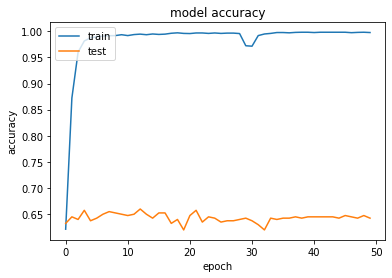

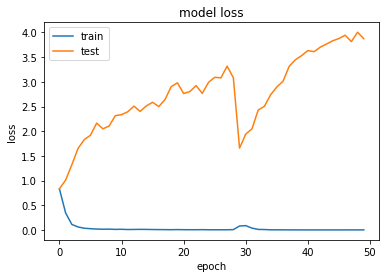

In [ ]:
plot_acc_loss(history)

# Load for Training

In [ ]:
df.head(1)

,text,aspect,label
0,can you check whether its cancelled completely?,cancelled,1


In [26]:
X = df_tokenized3.iloc[:, :].values
y = df.iloc[:, 2].values

In [66]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [32]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)

In [33]:
X_train.shape

(3600, 9039)

In [34]:
y_train.shape

(3600,)

# Linear Regression

In [54]:
from sklearn.linear_model import LogisticRegression
absa_model = LogisticRegression()
absa_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
print("Model accuracy on validation: ", absa_model.score(X_valid, y_valid))
print(classification_report(y_valid, absa_model.predict(X_valid).tolist(), target_names=['0', '1', '2']))

Model accuracy on validation:  0.7075


In [56]:
print(classification_report(y_valid, absa_model.predict(X_valid).tolist(), target_names=['0', '1', '2']))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       179
           1       0.66      0.72      0.69       124
           2       0.68      0.69      0.69        97

    accuracy                           0.71       400
   macro avg       0.70      0.71      0.70       400
weighted avg       0.71      0.71      0.71       400



# KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
absa_model = KNeighborsClassifier()
absa_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [58]:
print("Model accuracy on validation: ", absa_model.score(X_valid, y_valid))

Model accuracy on validation:  0.5525


In [59]:
print(classification_report(y_valid, absa_model.predict(X_valid).tolist(), target_names=['0', '1', '2']))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59       179
           1       0.65      0.38      0.48       124
           2       0.44      0.76      0.56        97

    accuracy                           0.55       400
   macro avg       0.57      0.57      0.54       400
weighted avg       0.59      0.55      0.55       400



# Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
absa_model = DecisionTreeClassifier()
absa_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [61]:
print("Model accuracy on validation: ", absa_model.score(X_valid, y_valid))

Model accuracy on validation:  0.58


In [62]:
print(classification_report(y_valid, absa_model.predict(X_valid).tolist(), target_names=['0', '1', '2']))

              precision    recall  f1-score   support

           0       0.64      0.63      0.63       179
           1       0.53      0.52      0.53       124
           2       0.53      0.57      0.55        97

    accuracy                           0.58       400
   macro avg       0.57      0.57      0.57       400
weighted avg       0.58      0.58      0.58       400



# SVM

In [63]:
from sklearn.svm import SVC
absa_model = SVC(kernel = 'rbf')
absa_model.fit(X_train, y_train.reshape(y_train.shape[0], ))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [64]:
print("Model accuracy on validation: ", absa_model.score(X_valid, y_valid))
print(classification_report(y_valid, absa_model.predict(X_valid).tolist(), target_names=['0', '1', '2']))

Model accuracy on validation:  0.725


In [65]:
print(classification_report(y_valid, absa_model.predict(X_valid).tolist(), target_names=['0', '1', '2']))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       179
           1       0.66      0.81      0.73       124
           2       0.77      0.53      0.63        97

    accuracy                           0.73       400
   macro avg       0.73      0.70      0.71       400
weighted avg       0.73      0.72      0.72       400



# Predict

In [ ]:
test = pd.read_csv('data/test.csv')

In [ ]:
test_text = test.iloc[:, 0].values.tolist()

# Aspect preprocessing
test_tokenized = pd.DataFrame(tokenizer.texts_to_matrix(test.text))
test_tokenized2 = pd.DataFrame(tokenizer2.texts_to_matrix(test.aspect))
test_tokenized3 = pd.concat([test_tokenized, test_tokenized2], axis=1)

# For DL

In [ ]:
test_sentiment = label_encoder.inverse_transform(np.argmax(absa_model.predict(test_tokenized3), axis=-1))

# For ML

In [ ]:
test_sentiment = absa_model.predict(test_tokenized3).tolist()

# Save Output

In [ ]:
test_sentiment

In [ ]:
test['label'] = test_sentiment

In [ ]:
test.to_csv('data/results/test.csv', index = False)

# Python Version